---

<p align="center">
  <img src="https://raw.githubusercontent.com/lacamposm/Diplomado_Metodos_UCentral/main/data/images/imagen_ucentral.jpg" alt="logo_Ucentral" width="400px" height="300px">
</p>

# ___Diplomado: Métodos Estadísticos para el Análisis de Datos___

## ___Docente: Luis Andres Campos Maldonado.___

### ___Datos categóricos___

- Moda.
- Bar-plot.
- Pie-plot.

---

In [ ]:
## Protocolo de módulos.
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px
import warnings
##
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## ***Exploración de datos categóricos.***

Para datos categóricos, las proporciones simples o porcentajes cuentan la historia de los datos.

***Palabras claves:***

***Moda:*** La categoría o valor que ocurre con más frecuencia en un conjunto de datos.

***Valor esperado:*** Cuando las categorías se pueden asociar con un valor numérico, esto da un promedio
valor basado en la probabilidad de ocurrencia de una categoría.

***Bar-plot:*** La frecuencia o proporción de cada categoría trazada como barras.

***Pie-plot:*** La frecuencia o proporción de cada categoría representada como cuñas en un pastel.

Obtener un resumen de una variable binaria o una variable categórica con algunas categorías
es algo bastante fácil: solo calculamos la proporción de 1s, o las proporciones de las categorías.

***Bar-plot:*** Recordemos que los bar-plots son una herramienta visual común para mostrar una única variable categórica. Las categorías se enumeran en el eje $x$ y las frecuencias o proporciones en el eje $y$.

In [ ]:
url_base= 'https://raw.githubusercontent.com/lacamposm/Diplomado_Metodos_UCentral/main/data/'
name_data = 'APARTAMENTOS.csv'
aptos = pd.read_csv(url_base + name_data, index_col=0,)
aptos.head()

,precio,mt2,ubicacion,estrato,alcobas,banos,balcon,parqueadero,administracion,avaluo,terminado
1,79.0,43.16,norte,3,3,1,si,si,0.050,14.923002,no
2,93.0,56.92,norte,2,2,1,si,si,0.069,27.000000,si
3,100.0,66.40,norte,3,2,2,no,no,0.000,15.738427,no
4,123.0,61.85,norte,2,3,2,si,si,0.130,27.000000,no
5,135.0,89.80,norte,4,3,2,si,no,0.000,39.567000,si


In [ ]:
## Para escribir en colab
#%load_ext autoreload
#%autoreload 2
#from google.colab import drive
#drive.mount('/content/drive')
#ruta = '/content/drive/MyDrive/Ucentral Maestría/Año_2023/Funda_Esta_Analítica_2023-I_GR06/prueba.csv'
#aptos.to_csv(ruta, index=False)

In [ ]:
aptos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 1 to 694
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   precio          694 non-null    float64
 1   mt2             694 non-null    float64
 2   ubicacion       694 non-null    object 
 3   estrato         694 non-null    int64  
 4   alcobas         694 non-null    int64  
 5   banos           694 non-null    int64  
 6   balcon          694 non-null    object 
 7   parqueadero     694 non-null    object 
 8   administracion  694 non-null    float64
 9   avaluo          694 non-null    float64
 10  terminado       694 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 65.1+ KB


In [ ]:
# pedir todos los descriptivos
aptos["precio"].describe().to_frame(name="descriptivos").T

,count,mean,std,min,25%,50%,75%,max
descriptivos,694.0,317.762739,247.614914,25.0,160.0,245.0,380.0,1700.0


In [ ]:
#
display(aptos["precio"].describe().to_frame(name="descriptivos").T)
display(aptos["mtm2"].describe().to_frame(name="descriptivos").T)

,count,mean,std,min,25%,50%,75%,max
descriptivos,694.0,317.762739,247.614914,25.0,160.0,245.0,380.0,1700.0


KeyError: ignored

In [ ]:
aptos.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,694.0,317.762739,247.614914,25.000,160.00,245.0000,380.000,1700.00
mt2,694.0,120.943818,74.695493,26.000,71.00,97.5000,141.750,500.00
estrato,694.0,4.651297,1.208205,2.000,4.00,5.0000,6.000,6.00
alcobas,694.0,2.910663,0.763962,1.000,3.00,3.0000,3.000,14.00
banos,694.0,2.289625,0.795718,1.000,2.00,2.0000,3.000,6.00
administracion,694.0,0.263556,0.251586,0.000,0.09,0.2010,0.375,2.28
avaluo,694.0,182.636593,169.082384,0.149,73.00,131.4315,234.051,1540.62


In [ ]:
## Tenemos información.
aptos['terminado'].value_counts(normalize=True)#*100

si    85.302594
no    14.697406
Name: terminado, dtype: float64

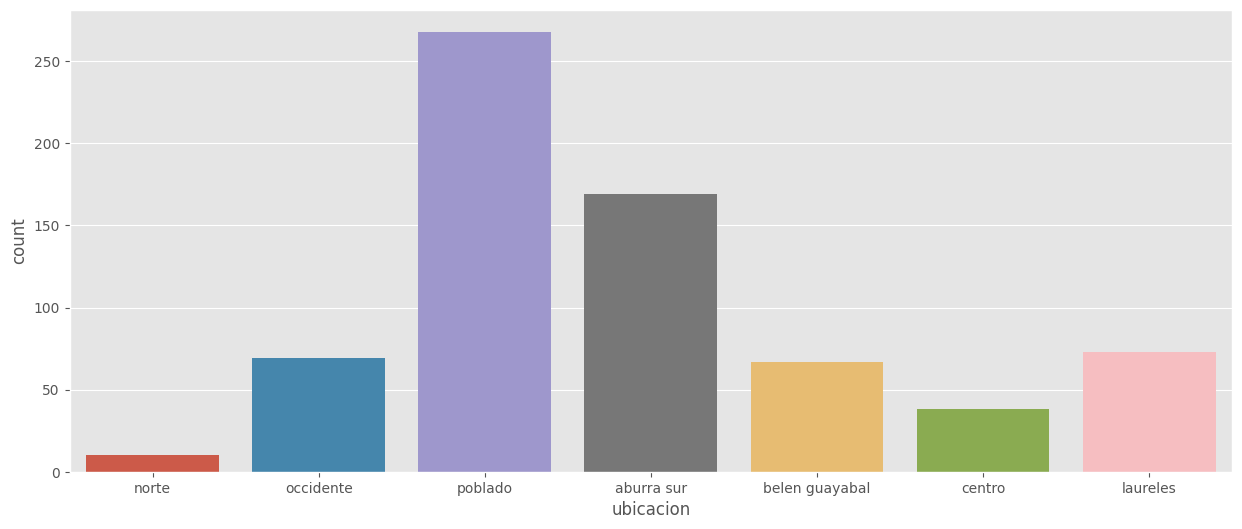

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=aptos, x='ubicacion',)
plt.show()

Por ejemplo, el plot anterior muestra la cantidad de elementos en cada una de las ubicación de los apartamentos en cuestión.

El siguiente plot muestra el porcentaje de los apartamentos en la muestra que están o no terminados.

In [ ]:
temp = aptos['terminado'].value_counts(normalize=True).round(4)*100
temp = temp.to_frame()
temp.reset_index(inplace=True)
temp = temp.rename(columns={'index':'categoria'})
temp

,categoria,terminado
0,si,85.3
1,no,14.7


In [ ]:
temp = aptos['terminado'].value_counts(normalize=True).round(4)*100
temp = temp.to_frame()
temp.reset_index(inplace=True)
temp = temp.rename(columns={'index':'categoria'})
##
fig = px.bar(temp, x='categoria', y='terminado',
             labels={'terminado':'Porcentaje','index':'Terminado'},
             title = 'Estado de los aptos')
fig.update_xaxes(title = 'Estado del apto')
fig.show()

***Nota:*** Tenga en cuenta que un bar-plot se parece a un histograma; en un bar-plot, el eje $x$ representa diferentes categorías de una feature de tipo factor, mientras que en un histograma, el eje $x$ representa valores de una sola variable en una escala numérica. Además, en un histograma, las barras normalmente se muestran tocándose entre sí, en un
bar-plot, las barras se muestran separadas unas de otras.
**Finalmente, la conversión de datos numéricos a categóricos datos es un paso importante y ampliamente utilizado en el análisis de datos, ya que
reduce la complejidad (y el tamaño) de los datos**. Esto ayuda en el descubrimiento de las relaciones entre las características, en particular en las etapas iniciales de un análisis.

***pie-plot:*** Los gráficos circulares son una alternativa a los gráficos de barras, aunque los estadísticos y quienes hacen la visualización de datos
a nivel experto, generalmente evitan los gráficos circulares porque son menos informativos visualmente.

***Moda***

La moda es el valor, o valores en caso de empate, que aparece con mayor frecuencia en los datos.
Por ejemplo, la moda de la ubicación en los apartamentos es "poblado". Como otro ejemplo, en la mayor parte de Colombia, la moda de la preferencia religiosa sería católica. La moda es un resumen estadístico simple para datos categóricos, y generalmente no se usa para datos numéricos.



***Valor esperado.***

Un tipo especial de datos categóricos son los datos en los que las categorías representan o pueden asignarse a valores discretos en la misma escala. Un comercializador de una nueva tecnología en la nube, por ejemplo, ofrece dos niveles de servicio, uno a un precio de $\$300/mes$ y otro a $\$50/mes$. El comercializador ofrece seminarios web gratuitos para generar clientes potenciales, y las cifras que tiene la empresa deter,imam que el 5% de los asistentes se inscribirá en el servicio de $\$300$, el $15\%$ se inscribirá en el servicio de $50 servicio, y el 80% no se suscribirá a nada. Estos datos se pueden resumir, para fines financieros, en un único “valor esperado”, que es una forma de media ponderada, en la que los pesos son probabilidades.

El valor esperado se calcula de la siguiente manera:

1. Multiplica cada resultado por su probabilidad de ocurrencia.
2. Sume estos valores.

En el ejemplo del servicio en la nube, el valor esperado de un asistente al seminario web es, por lo tanto, $\$22,50$ por mes, calculado de la siguiente manera:
$$EV=(0.05)(300)+(0.15)(50)+(0.80)(0)=22.5$$

El valor esperado es realmente una forma de media ponderada: agrega las ideas de futuras expectativas y pesos de probabilidad, a menudo basados ​​en juicios subjetivos. El valor esperado es un concepto fundamental en la valoración de empresas y el presupuesto de capital, por ejemplo, el valor esperado de cinco años de ganancias de una nueva adquisición, o el ahorros de costos esperados del nuevo software de gestión de pacientes en una clínica.

### ***Ejemplo 1.***

Vamos a generar un reporte de la tabla `APARTAMENTOS.csv`.

In [ ]:
aptos.head()

,precio,mt2,ubicacion,estrato,alcobas,banos,balcon,parqueadero,administracion,avaluo,terminado
1,79.0,43.16,norte,3,3,1,si,si,0.050,14.923002,no
2,93.0,56.92,norte,2,2,1,si,si,0.069,27.000000,si
3,100.0,66.40,norte,3,2,2,no,no,0.000,15.738427,no
4,123.0,61.85,norte,2,3,2,si,si,0.130,27.000000,no
5,135.0,89.80,norte,4,3,2,si,no,0.000,39.567000,si


In [ ]:
aptos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 1 to 694
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   precio          694 non-null    float64
 1   mt2             694 non-null    float64
 2   ubicacion       694 non-null    object 
 3   estrato         694 non-null    int64  
 4   alcobas         694 non-null    int64  
 5   banos           694 non-null    int64  
 6   balcon          694 non-null    object 
 7   parqueadero     694 non-null    object 
 8   administracion  694 non-null    float64
 9   avaluo          694 non-null    float64
 10  terminado       694 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 65.1+ KB


El dataset contiene 694 registros en 11 features, sin datos nulos. Tenemos al parecer 7 variables de tipo numérico y 4 objecto.

In [ ]:
# el estrato es categorica y no númerica
aptos.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,694.0,317.762739,247.614914,25.000,160.00,245.0000,380.000,1700.00
mt2,694.0,120.943818,74.695493,26.000,71.00,97.5000,141.750,500.00
estrato,694.0,4.651297,1.208205,2.000,4.00,5.0000,6.000,6.00
alcobas,694.0,2.910663,0.763962,1.000,3.00,3.0000,3.000,14.00
banos,694.0,2.289625,0.795718,1.000,2.00,2.0000,3.000,6.00
administracion,694.0,0.263556,0.251586,0.000,0.09,0.2010,0.375,2.28
avaluo,694.0,182.636593,169.082384,0.149,73.00,131.4315,234.051,1540.62


El método `describe()` en un pandas-DataFrame genera un resumen estadístico básico del dataset. Observe que solo fueron incluidas variables de tipo numérico.

Note que no tenemos ninguna vivienda de estrato 1. Además, tenemos propiedades de hasta 14 alcobas. El rango de los precios va desde 25 unidades monetatrias y hasta las 1700.

In [ ]:
aptos.describe(include=['object']).T

,count,unique,top,freq
ubicacion,694,7,poblado,268
balcon,694,2,si,509
parqueadero,694,2,si,568
terminado,694,2,si,592


El resumen anterior, muestra para cada feature categórica un pequeño resumen. Es este se muestran la cantidad de valores únicos en cada feature, así como la moda y la cantidad de ocurrencias de dicha moda. Note que aunque el estrato tiene ingresos numéricos, esta realmente se trabajada con una feature cualitativa ordinal.

In [ ]:
#transformar la variable de estrato
aptos['estrato'] = aptos['estrato'].astype('category')
aptos['estrato']

1      3
2      2
3      3
4      2
5      4
      ..
690    5
691    6
692    6
693    5
694    5
Name: estrato, Length: 694, dtype: category
Categories (5, int64): [2, 3, 4, 5, 6]

In [ ]:
aptos["estrato"].value_counts(normalize=True)*100

6    34.870317
3    23.198847
5    20.893372
4    19.884726
2     1.152738
Name: estrato, dtype: float64

In [ ]:
aptos.mean()

precio            317.762739
mt2               120.943818
alcobas             2.910663
banos               2.289625
administracion      0.263556
avaluo            182.636593
dtype: float64

Veamos como se distribuyen los precios en el "poblado"

In [ ]:
poblado = aptos[aptos['ubicacion']=='poblado'] ## poblado es el dataframe filtrado
##
fig = px.histogram(poblado,  x='precio', color_discrete_sequence=['rgb(100,50,100)'],
                   title = 'Distribución precios aptos: Sector poblado.', )
fig.update_layout(bargap=0.02, yaxis_title='Conteo')
fig.update_traces(xbins={'start':poblado['precio'].min(), 'end':poblado['precio'].max()})
fig.show()

El plot anterior muestra que la distribución de precios es ***sesgada a la derecha***, es decir la mayor parte de la información se concentra a la izquierda del plot.

In [ ]:
centro = aptos[aptos['ubicacion']=='centro']
##
fig = px.histogram(centro,  x='precio', color_discrete_sequence = ['rgb(100,50,50)'], nbins = 10,
                   title='Distribución precios aptos: Sector centro.', )
fig.update_layout(bargap = 0.02, yaxis_title='Conteo')
fig.show()

Veamos ambos plots en uno solo:

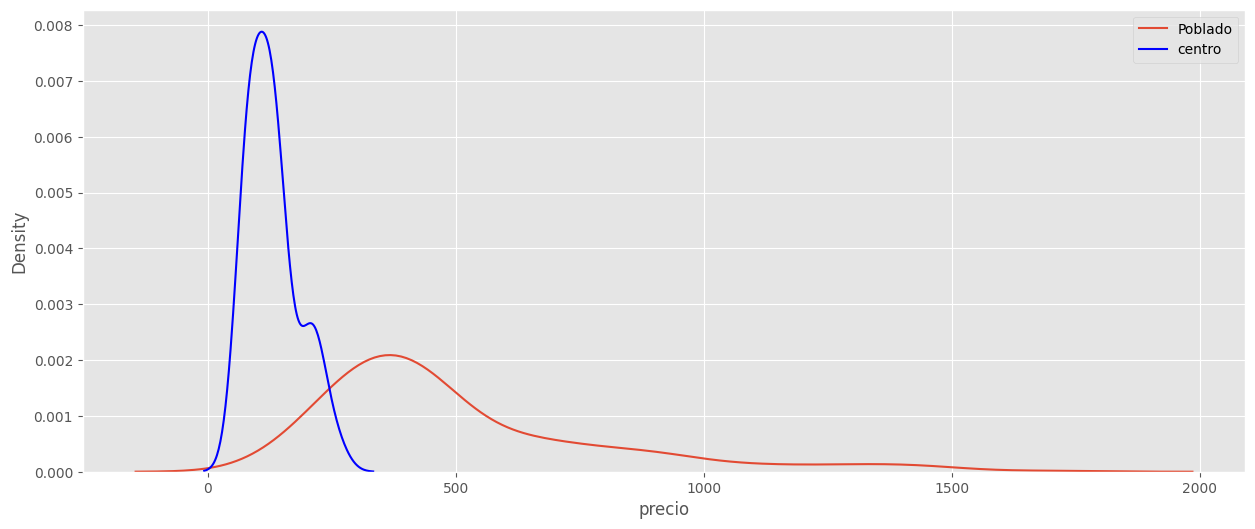

In [ ]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=poblado, x='precio', label='Poblado',)
sns.kdeplot(data=centro, x='precio', color='blue', label='centro',)
plt.legend()
plt.show()

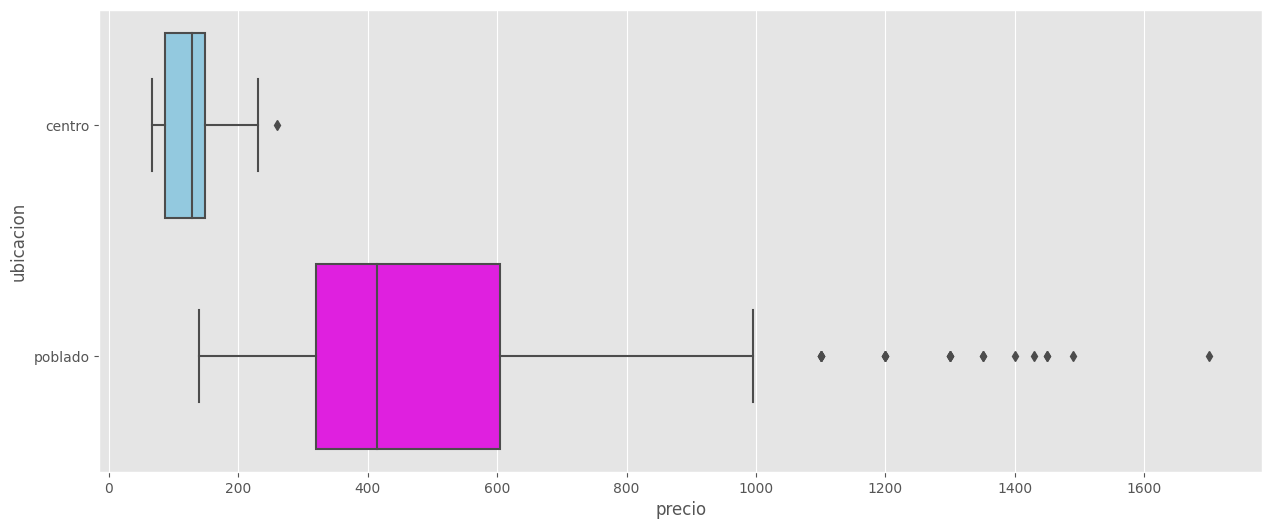

In [ ]:
## Veamos un par de box-plots.
temp = pd.concat([centro,poblado])#, axis= 0 ##se pega por debajo y. vien e por defaut ##axis = 1, se pega al lado
plt.figure(figsize=(15,6))
sns.boxplot(y='ubicacion', x='precio', data=temp, palette={'centro':'skyblue','poblado':'magenta'})
#seaborn no la. informacon con el puntero?
plt.show()

In [ ]:
## Veamos un par de box-plots.
temp = pd.concat([centro,poblado])#, axis= 0 ##se pega por debajo y. vien e por defaut ##axis = 1, se pega al lado
temp

,precio,mt2,ubicacion,estrato,alcobas,banos,balcon,parqueadero,administracion,avaluo,terminado
584,67.0,41.00,centro,3,2,1,no,no,0.0720,32.045,si
585,70.0,26.00,centro,4,1,1,no,no,0.0420,27.000,no
586,70.0,30.00,centro,3,1,1,no,si,0.0000,32.055,no
587,78.0,38.00,centro,3,1,1,si,no,0.0876,51.818,si
588,78.0,46.00,centro,3,2,1,no,no,0.0901,38.625,si
...,...,...,...,...,...,...,...,...,...,...,...
343,1430.0,291.00,poblado,6,3,3,si,si,0.7490,701.731,si
344,1450.0,318.00,poblado,6,3,3,si,si,0.7490,611.027,si
345,1450.0,238.19,poblado,6,4,4,si,si,0.8286,675.072,si
346,1490.0,445.00,poblado,6,5,4,si,si,0.7490,701.731,si


Más aún, podemos comparar la distribución de todas las ubicaciones:

<Axes: ylabel='precio'>

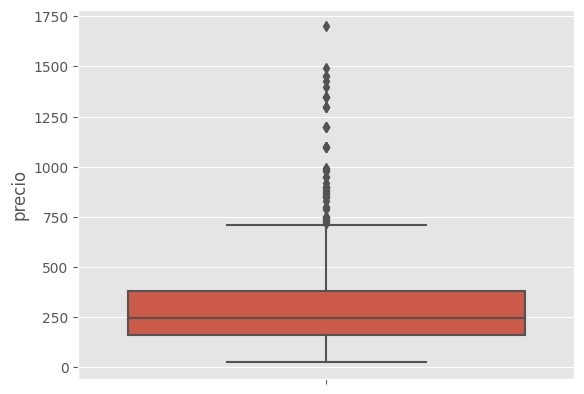

In [ ]:
sns.boxplot(data = aptos, y = "precio")

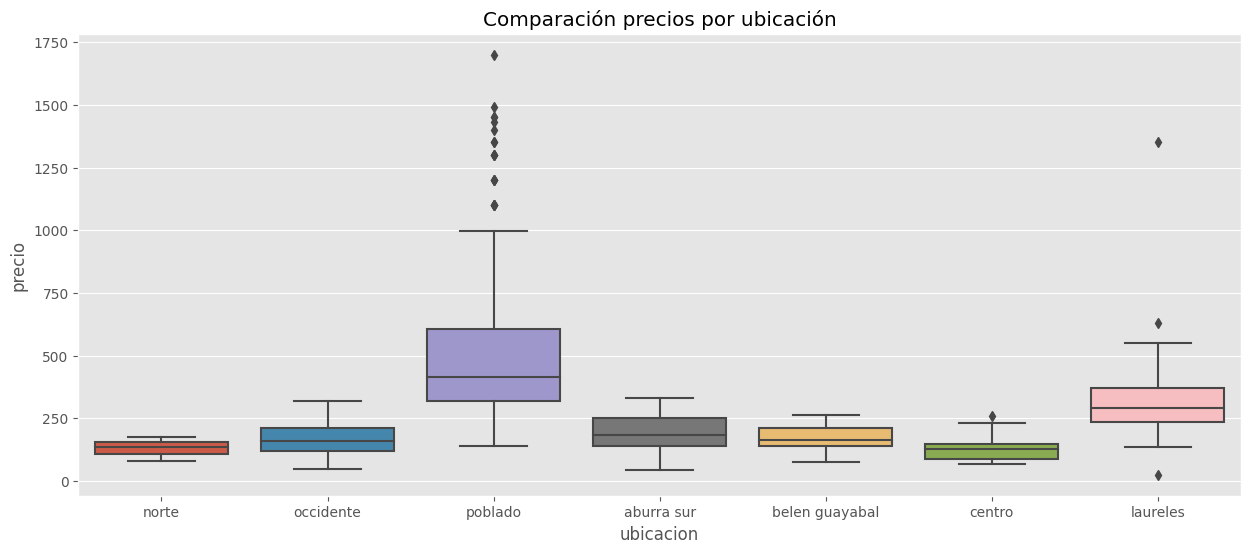

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='ubicacion', y='precio', data=aptos)
plt.title('Comparación precios por ubicación');
#plt.show()

Las zonas del "poblado" y "laureles" son las más costosas, en contraste "centro" y "norte" las que tienen precios más bajos.

In [ ]:
## Distribución de los estratos
#histograma (normalmente para variables numericas)
#para variable. categorica
fig = px.histogram(aptos, x='estrato', histnorm='percent',)
fig.update_layout(bargap=0.2, yaxis_title='Porcentaje',)
fig.show()